<center> <h1> MÍNIMOS QUADRADOS RECURSIVOS SOBRE SÉRIES TEMPORAIS </h1> </center>
    

<font size=3>Vamos gerar algumas variáveis aleatórias distribuídas normalmente, uma variável categórica binária e um erro normalmente distribuído para servir de banco de dados para nossa regressão. </font>

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import numpy as np

N = 300

v = (0.01)*sp.random.normal(size=N) # Processo aleatório gaussiano para gerar ruído
v

array([ 7.76689748e-03,  3.65198050e-03,  3.42816567e-03,  5.24269246e-03,
        2.72537156e-04, -4.36957048e-03,  6.42400648e-03,  4.70182100e-03,
        7.63424167e-03, -1.41149130e-03,  3.41096933e-03, -8.28374760e-03,
        1.69467132e-02, -8.19269039e-03,  9.28288066e-04,  6.68190631e-03,
       -6.01424618e-03,  9.22928556e-03,  3.04326521e-02, -2.59270706e-03,
       -9.72726662e-03, -2.38688753e-03, -2.13496245e-03,  5.93208373e-04,
        1.69233523e-02,  1.25407493e-03, -9.07412241e-05, -3.46845156e-03,
        1.26354418e-02,  1.70277075e-02, -2.10959603e-03, -4.22547952e-03,
        5.40938509e-03, -3.54186451e-03,  8.47426159e-03, -2.31931904e-03,
       -5.52449607e-04, -5.48997139e-03, -6.59277840e-03, -6.67490509e-03,
        1.52812165e-02, -2.21383749e-03,  2.93658671e-03, -2.38317795e-03,
        5.79442705e-03,  2.11098865e-03, -1.10124260e-02, -1.88829873e-03,
        2.39250332e-02,  6.68550661e-03, -4.41683728e-03, -1.35356115e-02,
        7.98647955e-03,  

In [2]:
e = np.zeros((N,1))  #Série de ruído contaminante
e

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [3]:
x = sp.random.normal(size=N) #Série de entrada
x

array([-1.56780362e+00, -8.27587949e-01,  4.32843472e-01, -8.92533969e-01,
       -3.15314683e-01,  6.76485976e-01, -9.33948224e-02,  1.32033452e+00,
       -4.33092508e-02,  7.26495547e-01,  1.77463025e+00, -8.86017037e-01,
       -1.14982205e+00, -1.07589163e+00, -9.02447190e-01,  5.74801498e-01,
       -1.43148957e+00, -1.42313780e-01, -9.53977973e-01,  7.81075355e-01,
        8.45642934e-01,  2.34243793e+00, -7.16449375e-01, -3.25512939e-01,
       -2.70777032e-01,  2.02733730e+00,  6.79421152e-01,  8.24957377e-01,
       -4.67537408e-01,  1.07616641e+00,  3.18694249e-01,  4.95418300e-01,
        3.74344678e-01, -9.21252381e-01, -1.57349370e+00,  4.40524422e-01,
        3.95494019e-01,  1.43108292e+00, -5.70070939e-01, -2.72158221e+00,
        6.57432519e-01,  7.95001103e-01,  4.93231451e-01,  1.40798093e-01,
       -6.68395524e-01,  2.34408059e-01,  1.63199837e+00,  7.62562876e-01,
        8.92766624e-02,  7.39062230e-01,  9.96467903e-01, -1.24964154e+00,
       -3.14749626e-01,  

In [4]:
y = np.zeros((N,1)) #Série de saída
y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [5]:
P = 1e4*np.eye(2) #Matriz de covari�ncia inicial
P

array([[10000.,     0.],
       [    0., 10000.]])

In [6]:
theta = np.zeros((2,1)) #ganhos de correção
theta

array([[0.],
       [0.]])

In [7]:
THETA = np.zeros((N,2)) #Registro das estimativas
THETA

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [8]:
k = np.zeros((2,1)) #ganhos de correção
k

array([[0.],
       [0.]])

In [9]:
K = np.zeros((N,2)) #registro dos ganhos
K

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [10]:
sigma = np.zeros((N,2))
sigma[0, :] = np.diagonal(P).T; #Variancias
sigma

array([[10000., 10000.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],
       [    0.,     0.],


In [11]:
labda = .95   #fator de esquecimento

In [12]:
sigma.setflags(write=1)

In [15]:
for t in range(1,N):
    # Estimador de MQ recursivo
    phi = np.array([[y[t-1]], [x[t-1]]]) # Regressores
    k= P*phi/(phi.T*P*phi+labda) #Atualização dos ganhos
    theta = theta + k*(y[t]-phi.T*theta) #Atualização dos parâmetros
    P = (P - P*phi*phi.T*P/(phi.T*P*phi+labda))/labda   #Atualização da matriz de covariancia
    k = np.diagonal(k)
    theta = np.diagonal(theta)
    sigma[t, :] =  np.diagonal(P).T #Armazena as variancias
    THETA[t,:] = theta.T  # Armazena os parametros
    K[t,:] = k.T #Armazena os ganhos

In [16]:
phi

array([[array([0.])],
       [-1.9950309095695606]], dtype=object)

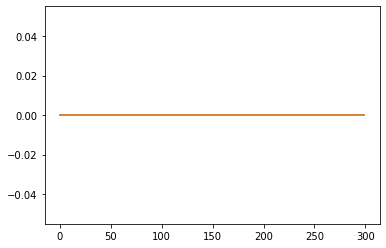

In [14]:
plt.plot(THETA)